In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import csv


from mpl_toolkits.mplot3d import axes3d 

In [2]:
directions_truth = []
with open('directions_truth.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        directions_truth.append(arr)
        

directions_reco = []
with open('directions_reco.txt', 'r', newline='') as f:
    for line in f:
        sl_reco = line.split(',')
        arr_reco = np.array([float(sl_reco[0]), float(sl_reco[1]), float(sl_reco[2])])
        directions_reco.append(arr_reco)

startpoints_truth = []
with open('startpoints_truth.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        startpoints_truth.append(arr)

startpoints_reco = []
with open('startpoints_reco.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        startpoints_reco.append(arr)
        
endpoints_truth = []
with open('endpoints_truth.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        endpoints_truth.append(arr)

endpoints_reco = []
with open('endpoints_reco.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        endpoints_reco.append(arr)

direction_dot = []
for k in range(100):
    direction_dot.append(np.dot(directions_reco[k], directions_truth[k]))

index_of_0_99 = []
for k in range(100):
    if direction_dot[k] >= 0.99:
        index_of_0_99.append(k)

In [3]:
directions_reco

[array([0.533157, 0.779849, 0.327992]),
 array([ 0.87284  ,  0.0711319, -0.482795 ]),
 array([-0.928425,  0.198287, -0.314182]),
 array([ 0.604411 , -0.0254357,  0.796266 ]),
 array([ 0.895234,  0.315138, -0.315031]),
 array([0.267676, 0.35577 , 0.89542 ]),
 array([ 0.686715, -0.502281,  0.525487]),
 array([ 0.338577, -0.452315, -0.825092]),
 array([0.162456, 0.115654, 0.979914]),
 array([-0.575374,  0.581631, -0.575021]),
 array([-0.472569, -0.534922, -0.700383]),
 array([-0.881468, -0.427099, -0.201496]),
 array([-0.369569, -0.270621, -0.888922]),
 array([ 0.426475, -0.88808 ,  0.171561]),
 array([ 0.0576451,  0.0122056, -0.998263 ]),
 array([0.288327, 0.789476, 0.541845]),
 array([ 0.609637,  0.278452, -0.742164]),
 array([ 0.259645, -0.56243 , -0.78502 ]),
 array([ 0.0592434, -0.936734 , -0.344993 ]),
 array([ 0.472548, -0.821308,  0.319613]),
 array([ 0.257657, -0.737677,  0.624055]),
 array([ 0.0534837, -0.836709 , -0.545031 ]),
 array([ 0.480884, -0.281495,  0.830368]),
 array([

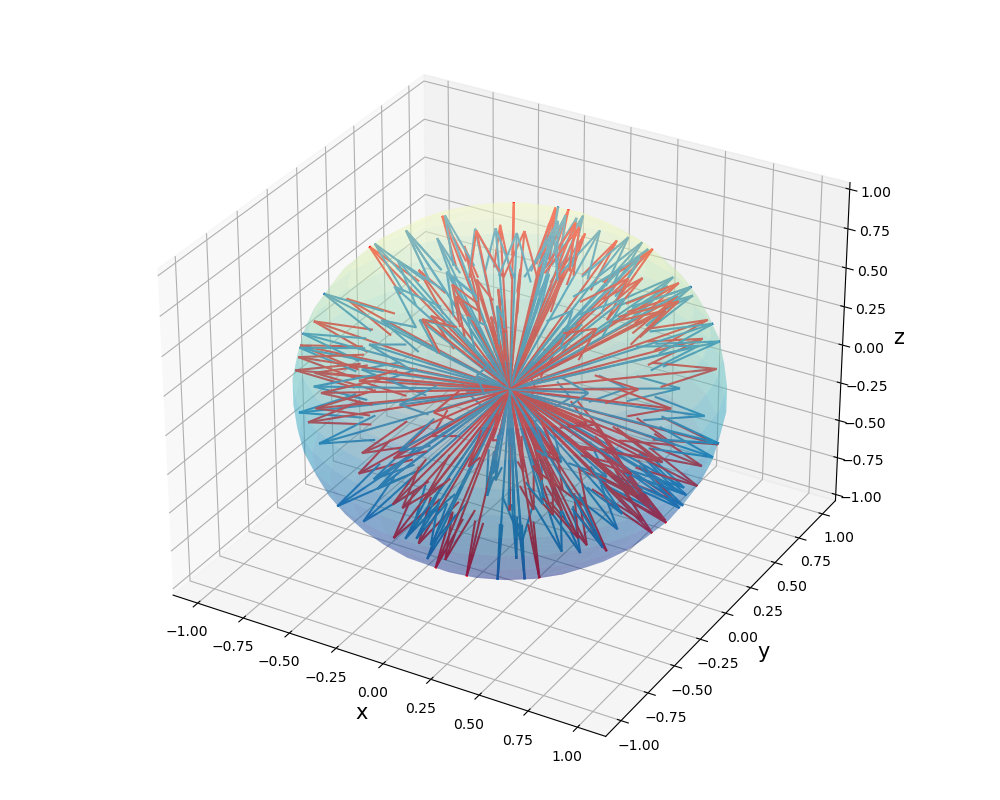

In [64]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r,alpha=0.3)
start = [0, 0, 0]
for i in range(100):
    ax.quiver(start[0], start[1], start[2], directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(start[0], start[1], start[2], directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='red')
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
ax.set_zlabel("z", fontsize=15)
plt.show()

In [65]:
startpoints_truth = []
with open('startpoints_truth.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        startpoints_truth.append(arr)
            

In [54]:
startpoints_reco = []
with open('startpoints_reco.txt', 'r', newline='') as f:
    for line in f:
        sl = line.split(',')
        arr = np.array([float(sl[0]), float(sl[1]), float(sl[2])])
        startpoints_reco.append(arr)
            

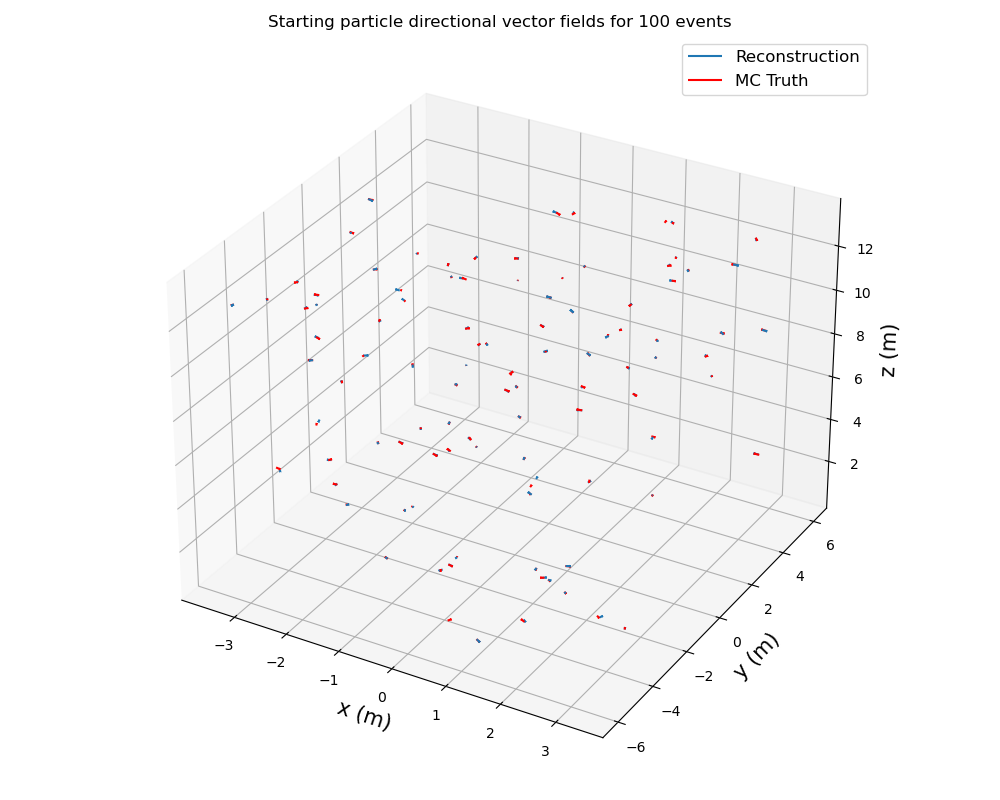

In [55]:
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.quiver(startpoints_reco[0][0]/100, startpoints_reco[0][1]/100, startpoints_reco[0][2]/100, directions_reco[0][0], directions_reco[0][1], directions_reco[0][2],label='Reconstruction')
ax.quiver(startpoints_truth[0][0]/100, startpoints_truth[0][1]/100, startpoints_truth[0][2]/100, directions_truth[0][0], directions_truth[0][1], directions_truth[0][2],color='r',label='MC Truth')
num = 100
for i in range(1,num):
    ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("Starting particle directional vector fields for " + str(num) + " events", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [56]:
len(startpoints_reco)

100

In [57]:
direction_dot = []
for k in range(100):
    direction_dot.append(np.dot(directions_reco[k], directions_truth[k]))

In [58]:
len(direction_dot)

100

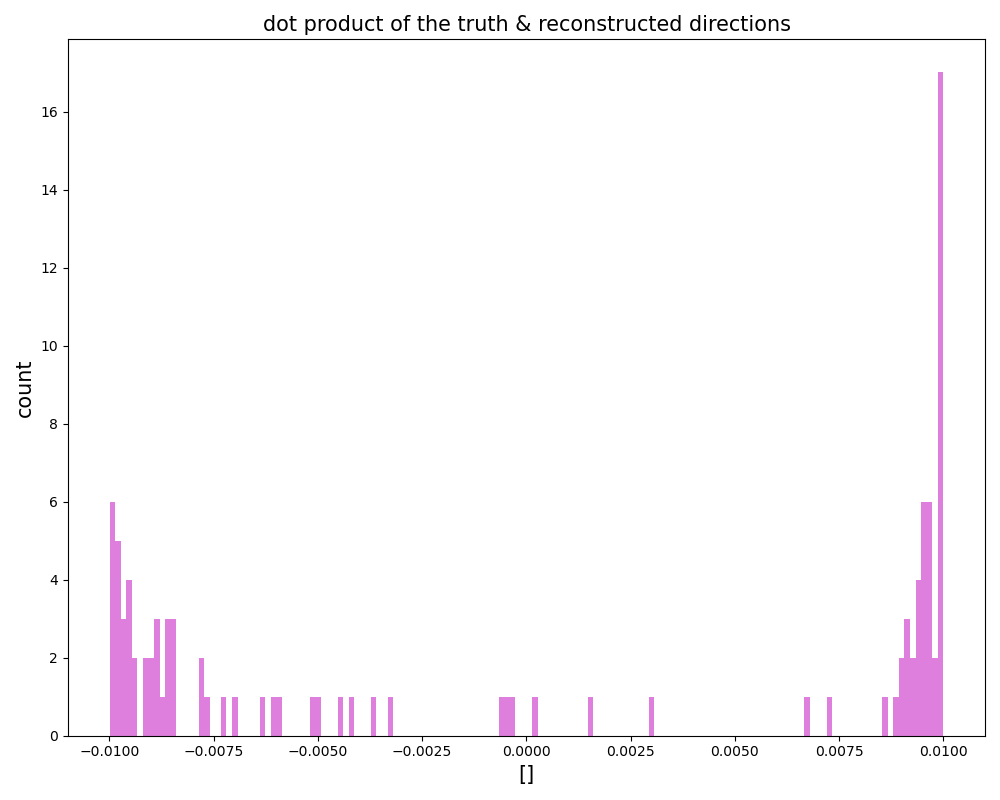

In [59]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(direction_dot, bins = 150,color='m',alpha=0.5)
ax.set_title("dot product of the truth & reconstructed directions",size=15)
ax.set_xlabel("[]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
plt.show()

In [60]:
index_of_gt = []
for k in range(100):
    if direction_dot[k] >= 0.9:
        index_of_gt.append(k)

IndexError: list index out of range

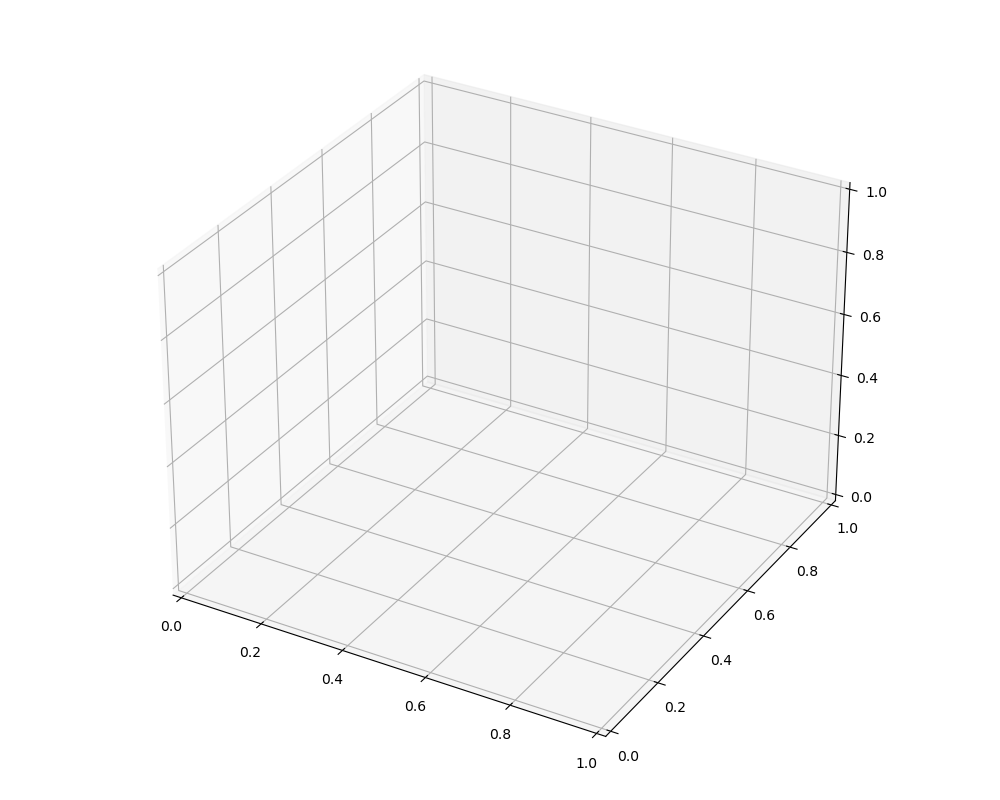

In [61]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

i = index_of_gt[0]
ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2],label='Reconstruction')
ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r',label='MC Truth')

for i in index_of_gt:
    ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("dot product of truth & reconstructed directions >= 0.9 (" + str(len(index_of_gt)) + "% of events)", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [62]:
index_of_lt = []
for k in range(100):
    if direction_dot[k] <= -0.9:
        index_of_lt.append(k)

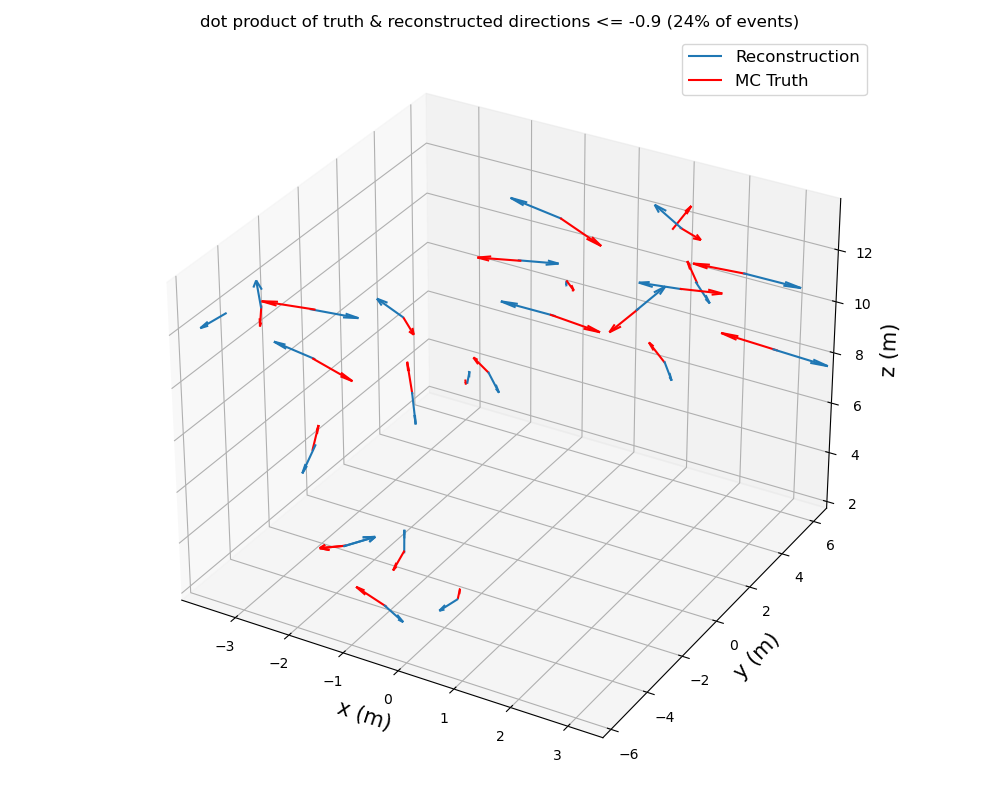

In [16]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

i = index_of_lt[0]
ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2],label='Reconstruction')
ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r',label='MC Truth')

for i in index_of_lt:
    ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("dot product of truth & reconstructed directions <= -0.9 (" + str(len(index_of_lt)) + "% of events)", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [17]:
index_of_rest = []
for k in range(100):
    if direction_dot[k] < 0.9 and direction_dot[k] > -0.9:
        index_of_rest.append(k)

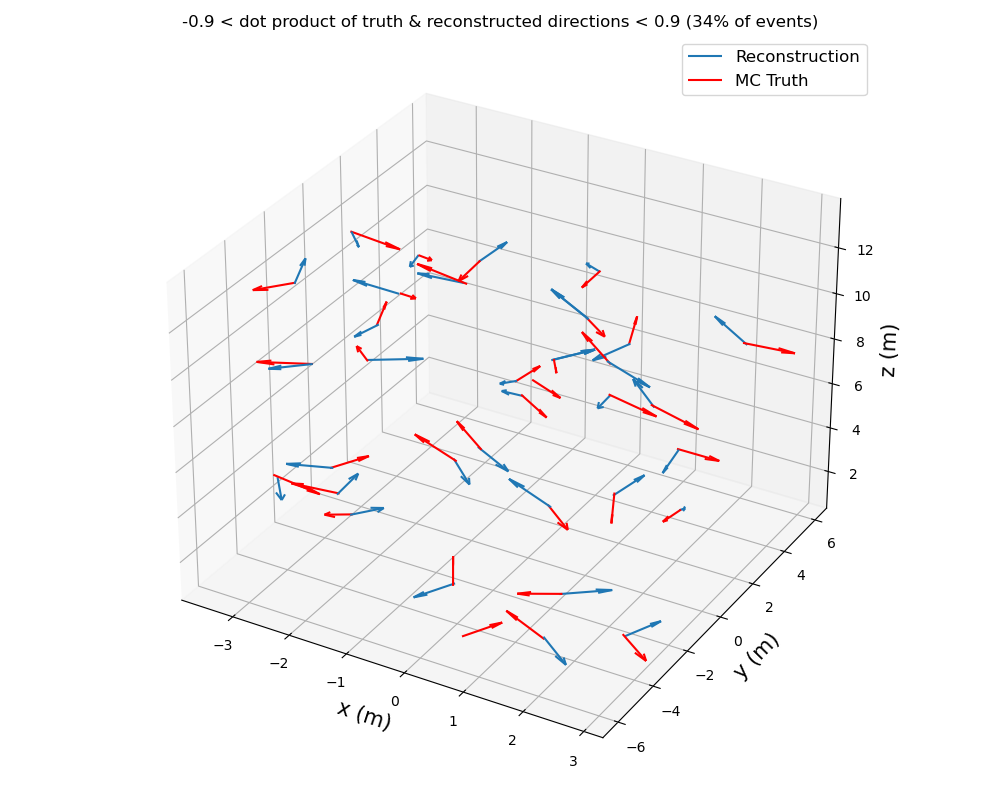

In [18]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

i = index_of_lt[0]
ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2],label='Reconstruction')
ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r',label='MC Truth')

for i in index_of_rest:
    ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("-0.9 < dot product of truth & reconstructed directions < 0.9 (" + str(len(index_of_rest)) + "% of events)", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [19]:
Px = []
Py = []
Pz = []
for direction in directions_truth:
    Px.append(direction[0])
    Py.append(direction[1])
    Pz.append(direction[2])

In [20]:
plt.close

<function matplotlib.pyplot.close(fig=None)>

In [21]:
px = []
py = []
pz = []
for direction in directions_reco:
    px.append(direction[0])
    py.append(direction[1])
    pz.append(direction[2])

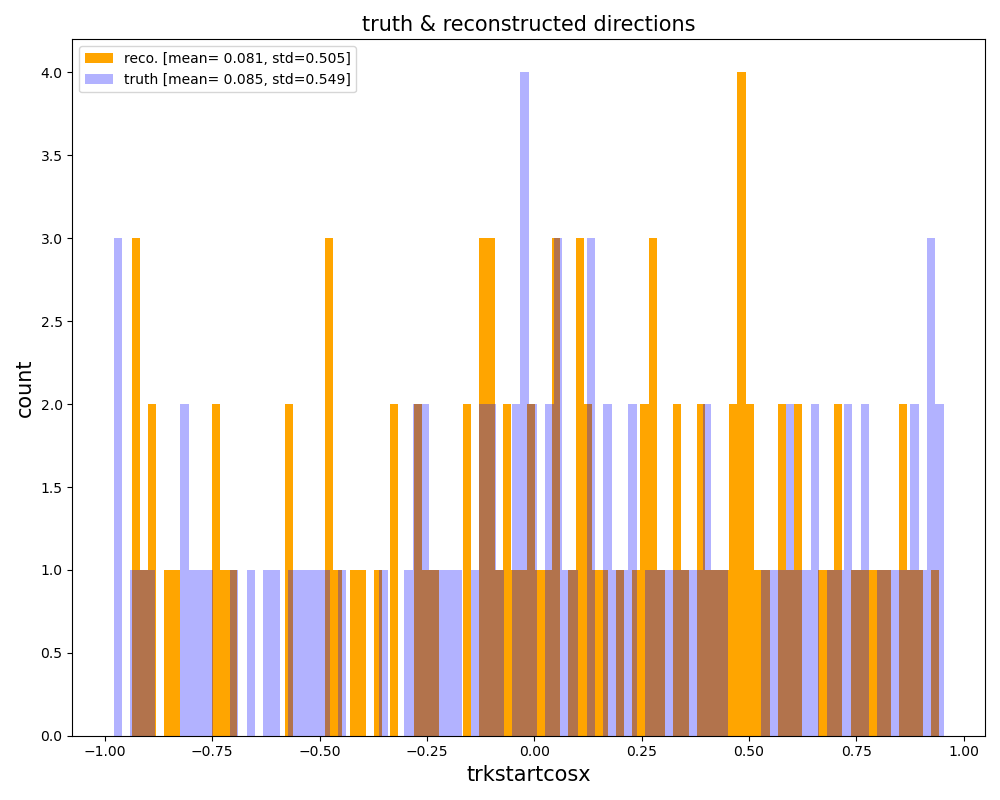

In [22]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(px, bins = 100,label="reco. [mean= " + str(round(np.mean(np.array(px)),3)) + ', std=' + str(round(np.std(np.array(px)),3)) +"]",color='orange')
ax.hist(Px, bins = 100,label="truth [mean= " + str(round(np.mean(np.array(Px)),3)) + ', std=' + str(round(np.std(np.array(Px)),3)) +"]",color='blue',alpha=0.3)
ax.set_title("truth & reconstructed directions",size=15)
ax.set_xlabel("trkstartcosx", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

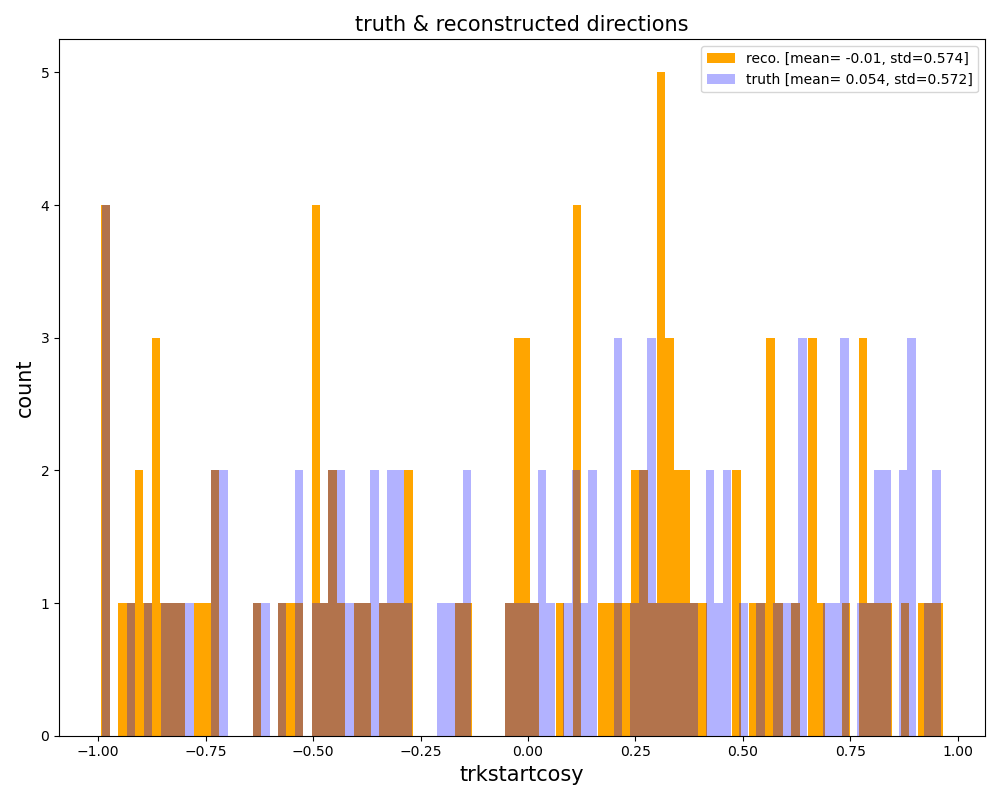

In [23]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(py, bins = 100,label="reco. [mean= " + str(round(np.mean(np.array(py)),3)) + ', std=' + str(round(np.std(np.array(py)),3)) +"]",color='orange')
ax.hist(Py, bins = 100,label="truth [mean= " + str(round(np.mean(np.array(Py)),3)) + ', std=' + str(round(np.std(np.array(Py)),3)) +"]",color='blue',alpha=0.3)
ax.set_title("truth & reconstructed directions",size=15)
ax.set_xlabel("trkstartcosy", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

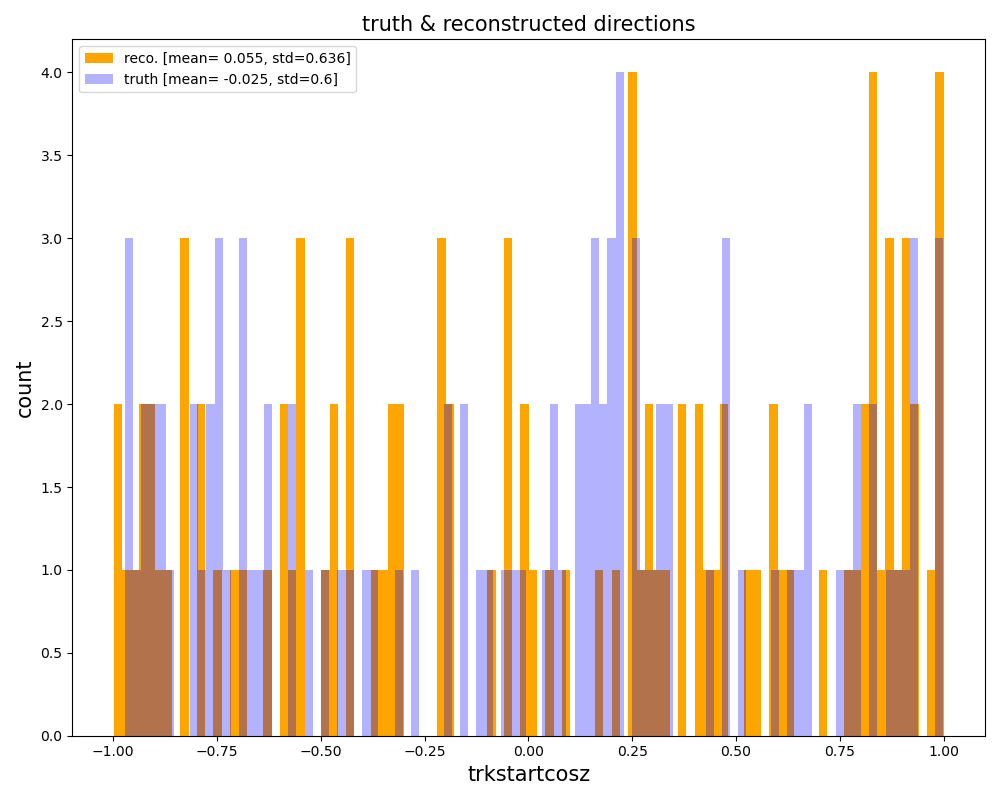

In [24]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(pz, bins = 100,label="reco. [mean= " + str(round(np.mean(np.array(pz)),3)) + ', std=' + str(round(np.std(np.array(pz)),3)) +"]",color='orange')
ax.hist(Pz, bins = 100,label="truth [mean= " + str(round(np.mean(np.array(Pz)),3)) + ', std=' + str(round(np.std(np.array(Pz)),3)) +"]",color='blue',alpha=0.3)
ax.set_title("truth & reconstructed directions",size=15)
ax.set_xlabel("trkstartcosz", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

In [25]:
hits_per_event= []
with open('hits_per_events.txt', 'r', newline='') as f:
    for line in f:
        arr = int(line)
        hits_per_event.append(arr)

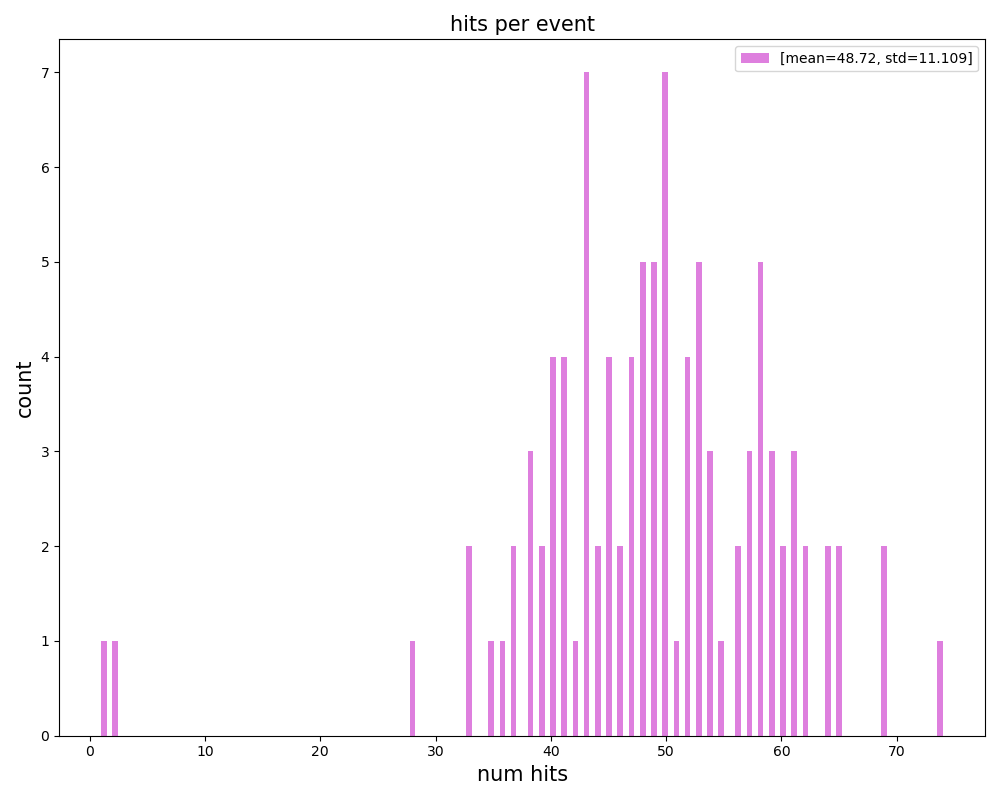

In [26]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(hits_per_event, bins = 150,color='m',alpha=0.5, label="[mean=" + str(round(np.mean(np.array(hits_per_event)),3)) + ', std=' + str(round(np.std(np.array(hits_per_event)),3)) + ']')
ax.set_title("hits per event",size=15)
ax.set_xlabel("num hits", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

In [27]:
energy_per_event= []
with open('energy_per_event.txt', 'r', newline='') as f:
    for line in f:
        arr = float(line)
        energy_per_event.append(arr)

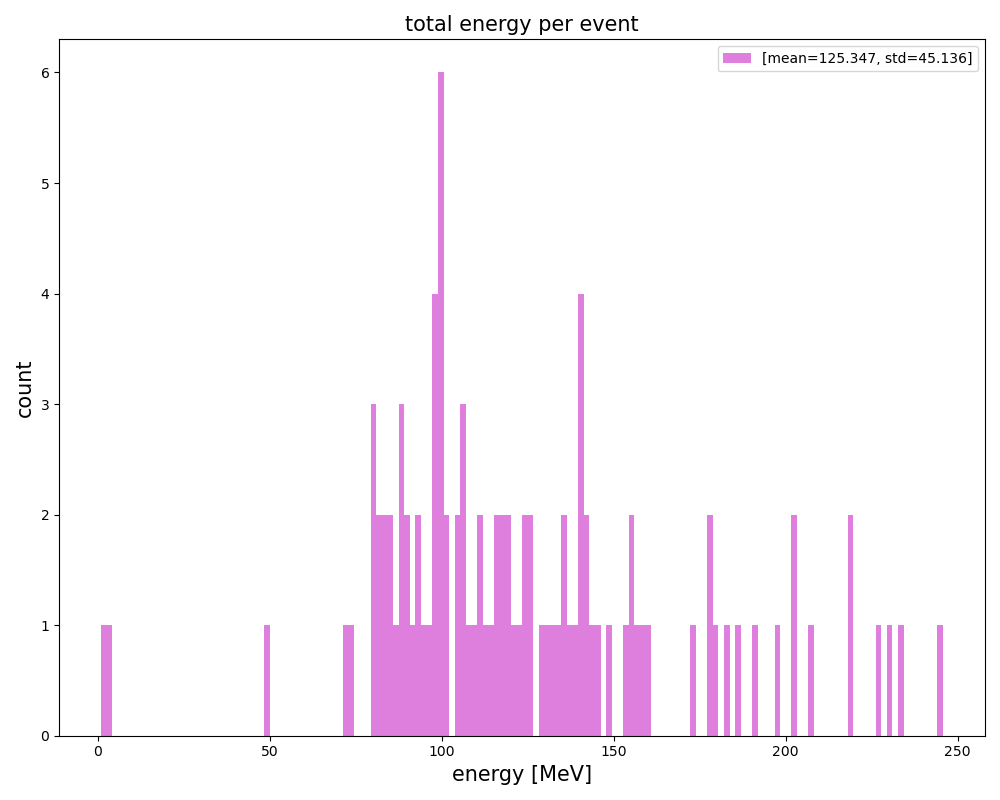

In [28]:
# Creating histogram
fig, ax = plt.subplots(figsize =(10,8))
ax.hist(energy_per_event, bins = 150,color='m',alpha=0.5, label="[mean=" + str(round(np.mean(np.array(energy_per_event)),3)) + ', std=' + str(round(np.std(np.array(energy_per_event)),3)) + ']')
ax.set_title("total energy per event",size=15)
ax.set_xlabel("energy [MeV]", fontsize=15)
ax.set_ylabel("count", fontsize=15)
ax.legend()
plt.show()

In [29]:
index_of_0_99 = []
for k in range(100):
    if direction_dot[k] >= 0.99:
        index_of_0_99.append(k)

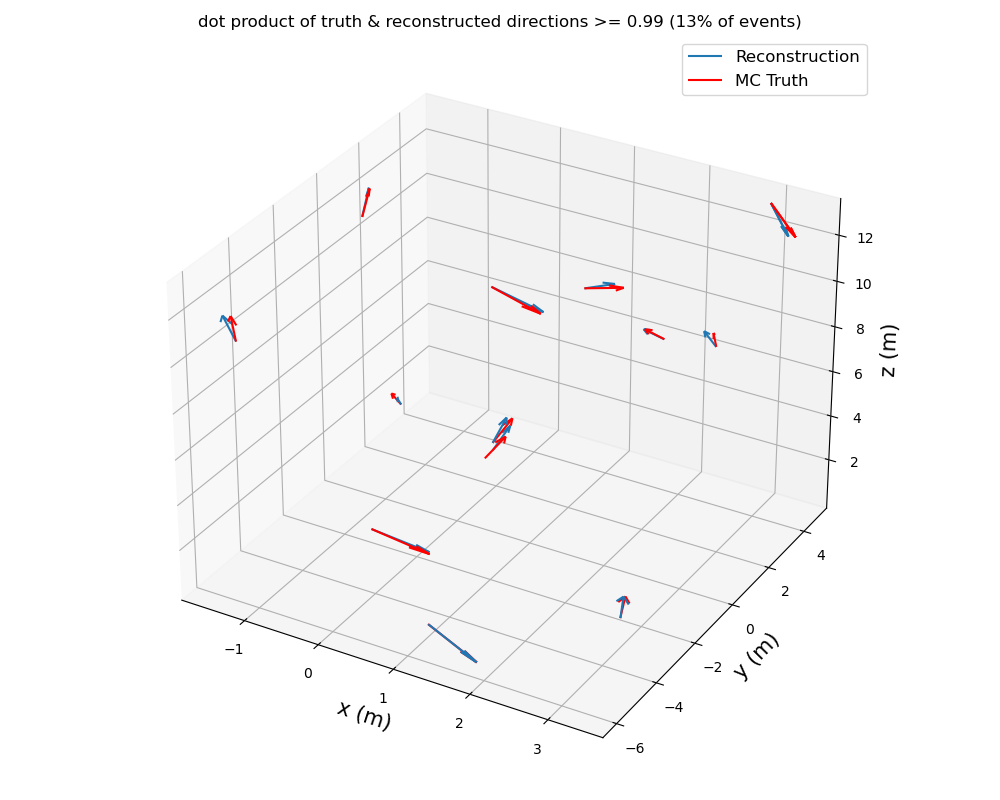

In [50]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')

i = index_of_0_99[0]
ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2],label='Reconstruction')
ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r',label='MC Truth')

test = 16
#ax.quiver(startpoints_truth[test][0]/100, startpoints_truth[test][1]/100, startpoints_truth[test][2]/100, directions_truth[test][0], directions_truth[test][1], directions_truth[test][2],color='m',label='MC Truth')

for i in index_of_0_99:
    ax.quiver(startpoints_reco[i][0]/100, startpoints_reco[i][1]/100, startpoints_reco[i][2]/100, directions_reco[i][0], directions_reco[i][1], directions_reco[i][2])
    ax.quiver(startpoints_truth[i][0]/100, startpoints_truth[i][1]/100, startpoints_truth[i][2]/100, directions_truth[i][0], directions_truth[i][1], directions_truth[i][2],color='r')
ax.set_xlabel("x (m)", fontsize=15)
ax.set_ylabel("y (m)", fontsize=15)
ax.set_zlabel("z (m)", fontsize=15)
ax.set_title("dot product of truth & reconstructed directions >= 0.99 (" + str(len(index_of_0_99)) + "% of events)", fontsize=12)
ax.legend(fontsize=12)
plt.show()


In [31]:
index_of_0_99

[7, 16, 22, 28, 36, 44, 49, 67, 75, 77, 80, 87, 97]

In [36]:
startpoints_reco[17]

array([-224.273 ,   82.4783,  652.401 ])

In [44]:
plt.close

<function matplotlib.pyplot.close(fig=None)>